# **Kütüphaneler**

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# **Veri Setini Okuma**

In [2]:
df=pd.read_csv("Kiwibank.csv")
df.head(3)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,Christchurch,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Auckland,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,Auckland,Female,42,8,159660.80,3,1,0,113931.57,1


# **Etiketi Etkilemeyen Sütunları Çıkarma**

In [3]:
df=df.drop(['CustomerId', 'Surname'], axis=1)
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,619,Christchurch,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Auckland,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Auckland,Female,42,8,159660.80,3,1,0,113931.57,1


# **Kategorik Sütunlar için Label Encoding**

In [4]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in ['Geography', 'Gender']:
    df[col] = encoder.fit_transform(df[col])
    print({i: c for i, c in enumerate(encoder.classes_)})

df.head()

{0: 'Auckland', 1: 'Christchurch', 2: 'Dunedin', 3: 'Hamilton', 4: 'Nelson', 5: 'New Plymouth', 6: 'Palmerston North', 7: 'Rotorua', 8: 'Tauranga', 9: 'Wellington'}
{0: 'Female', 1: 'Male'}


,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,608,0,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,850,5,0,43,2,125510.82,1,1,1,79084.10,0


# **Train Test Split**

In [5]:
X=df.drop(['Churn'], axis=1)
y=df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

# **Sınıf Tanımı**

In [6]:
import time
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score

class GaussianNaiveBayes:
    def fit(self, X, y):

        self.classes = np.unique(y)
        n_features = X.shape[1]
        self.mean = {}
        self.var = {}
        self.priors = {}

        for c in self.classes:
            X_c = X[y == c]
            self.mean[c] = np.mean(X_c, axis=0)
            self.var[c] = np.var(X_c, axis=0)
            self.priors[c] = X_c.shape[0] / float(X.shape[0])

    def gaussian_probability(self, x, mean, var):

        eps = 1e-6
        coeff = 1.0 / np.sqrt(2.0 * np.pi * var + eps)
        exponent = np.exp(- ((x - mean) ** 2) / (2.0 * var + eps))
        return coeff * exponent

    def predict(self, X):

        y_pred = []
        for x in X:
            posteriors = []
            for c in self.classes:
                prior = np.log(self.priors[c])
                likelihood = np.sum(np.log(self.gaussian_probability(x, self.mean[c], self.var[c])))
                posterior = prior + likelihood
                posteriors.append(posterior)

            y_pred.append(self.classes[np.argmax(posteriors)])
        return np.array(y_pred)

# **Model Eğitimi, Tahmini ve Performans Metrikleri**

Confusion Matrix:
[[1550   29]
 [ 322   99]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1579
           1       0.77      0.24      0.36       421

    accuracy                           0.82      2000
   macro avg       0.80      0.61      0.63      2000
weighted avg       0.82      0.82      0.79      2000

Train Time:  0.0037178993225097656
Test Time:  0.282808780670166


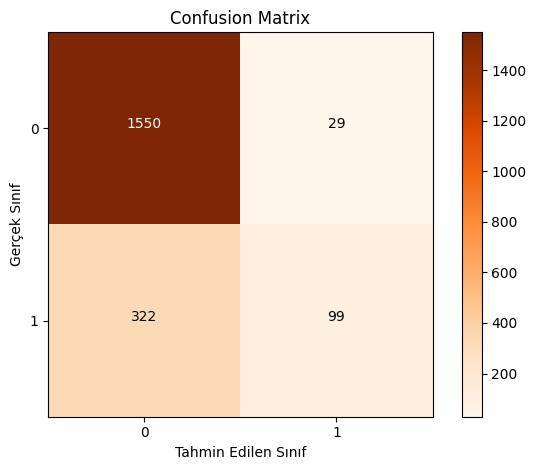

In [11]:
import matplotlib.pyplot as plt

if __name__ == "__main__":

    gnb=GaussianNaiveBayes()

    start_train = time.time()
    model=gnb.fit(X_train.values, y_train.values)
    train_time_sk = time.time() - start_train

    start_test = time.time()
    y_pred=gnb.predict(X_test.values)
    test_time_sk = time.time() - start_test

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("Train Time: ", train_time_sk)
    print("Test Time: ", test_time_sk)

    classes = ["0", "1"]
    title = "Confusion Matrix"
    cmap = plt.cm.Oranges

    plt.figure()
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], "d"),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel("Gerçek Sınıf")
    plt.xlabel("Tahmin Edilen Sınıf")
    plt.tight_layout()
    plt.show()